# apikey的获取流程（从注册账户到生成key）+调用示例(可以给官方的例子)

## 百度一言API获取方法

打开网站：

<https://cloud.baidu.com/wenxin.html>

<!-- ![descript](./media1_image1.png) -->

<img src="./images/media1_image1.png"  />


右上角登录百度云的账号，如果没有账号需要自行注册。

登录完成之后打开大模型控制台页面：

<https://console.bce.baidu.com/qianfan/ais/console/applicationConsole/application>

<!-- ![descript](./media1_image2.png) -->
<img src="./images/media1_image2.png"  />


然后点击创建应用，进行api应用创建，如果无法创建，可能是没有进行实名认证，请根据页面提示进行实名认证。

应用创建完成之后，点击操作栏中的详情按钮，查看应用的api key和api secret
key

<!-- ![descript](./media1_image3.png) -->
<img src="./images/media1_image3.png"  />


**百度一言的调用方法：**
```python 
# 定义类ErnieLLM，用于初始化文心一言bot
class ErnieLLM():
    """
    百度文心一言 ERNIE-Bot 参考文档：https://cloud.baidu.com/doc/WENXINWORKSHOP/s/clntwmv7t
    """
    def __init__(self):
        self.API_KEY = "xxxxxxxx" # 此处直接替换xxxxxxx为获取到的 API_KEY
        self.SECRET_KEY = "xxxxxxx" # 此处直接替换xxxxxxx为获取到的 SECRET_KEY
        self.ACCESS_TOKEN = self.get_access_token()

    def get_access_token(self):
        """
        使用 AK，SK 生成鉴权签名（Access Token）
        :return: access_token，或是None(如果错误)
        """
        url = "https://aip.baidubce.com/oauth/2.0/token"
        params = {
            "grant_type": "client_credentials",
            "client_id": self.API_KEY,
            "client_secret": self.SECRET_KEY,
        }
        return str(requests.post(url, params=params).json().get("access_token"))

    def _chat(self, text):
        """
        使用 ERNIE 生成回复
        暂时不考虑多轮对话
        """
        url = (
            "https://aip.baidubce.com/rpc/2.0/ai_custom/v1/wenxinworkshop/chat/completions?access_token="
            + self.ACCESS_TOKEN
        )

        payload = json.dumps({"messages": [{"role": "user", "content": text}]})
        headers = {"Content-Type": "application/json"}

        response = requests.request("POST", url, headers=headers, data=payload)

        return response.json()["result"]
        
# 初始化ernie_bot实例
ernie_bot = ErnieLLM()

# 定义prompt
prompt="你好"

#调用大模型
result = ernie_bot._chat(prompt)

# 输出
print(result)
```

## 星火大模型API获取方法

打开网站：

<https://xinghuo.xfyun.cn/sparkapi>

<!-- ![descript](./media1_image5.png) -->
<img src="./images/media1_image5.png"  />

然后在右上角登录星火的账号，如果没有账号请自行注册。

接下来点击该页面中的服务管理按钮，进入星火大模型的用量管理页面，如果无法进入，可能是因为没有实名认证，请遵照提示完成账号的实名认证。

<!-- ![descript](./media1_image6.png) -->
<img src="./images/media1_image6.png"  />


可以在页面中找到星火大模型需要的api key 和secret key


**星火大模型的调用方法：**

1. **安装包**
```sh
pip install sparkdesk-api==1.5.0
pip install websocket-client
```

2. **调用示例：**
``` python
# 导入必要的模块
from sparkdesk_api.core import SparkAPI

# 定义 SparkLLM 类，继承自 BaseLLM
class SparkLLM():
    def __init__(self):
        # 初始化 SparkAPI 实例，传入环境变量中的 app_id、api_secret、api_key，并指定版本为 2.1
        self.llm = SparkAPI(
            app_id="xxxxxxxx", # 此处直接替换xxxxxxx为获取到的 app_id
            api_secret="xxxxxxxx", # 此处直接替换xxxxxxx为获取到的 api_secret
            api_key="xxxxxxxx", # 此处直接替换xxxxxxx为获取到的 api_key
            version=3.1
        )

    def _chat(self, text):
        # 调用 SparkAPI 实例的 chat 方法进行对话处理
        response = self.llm.chat(text)
        # 返回处理后的回复
        return response

#初始化 spark_bot 实例
spark_bot = SparkLLM()

#定义prompt
prompt = "你好"

#调用大模型
response = spark_bot._chat(prompt)

#输出
print(response)
```


## OpenAI大模型API获取方法

使用 ChatGPT 需要一个 OpenAI 账号，你可以通过
https://platform.openai.com/ 官网注册。

在此之前，你需要先打开魔法上网环境，最好是美国等地区，不能是香港地区，不然会提示不能再当前国家服务。

<!-- ![descript](./media1_image7.png) -->
<img src="./images/media1_image7.png"  />


根据流程完成注册，如果需要国外手机号，请使用接码平台<https://sms-activate.org/>或者其他合法途径获取。

注册完成之后打开api-keys页面：

<https://platform.openai.com/api-keys>

<!-- ![descript](./media1_image8.png) -->
<img src="./images/media1_image8.png"  />



如果需要本地运行代码请看下面：


<span style="color:red">注意：</span>
- 实验平台课件中使用的是虚拟key，通过配置代理的方法请求到openAI，无需额外的填充apikey到实验平台课件中
- 如果需要本地运行openAI的方法，则要使用openAI官方提供的key，然后需要使用第三方代理，代理的方法往下看。
- 如果要使用我们发放的key，则需要参照学习手册的python调用示例

**openAI代理的方法**
- 1.自行查找代理地址: 代理地址+ openAI的apikey;
- 把代理地址放到base_url中;
- 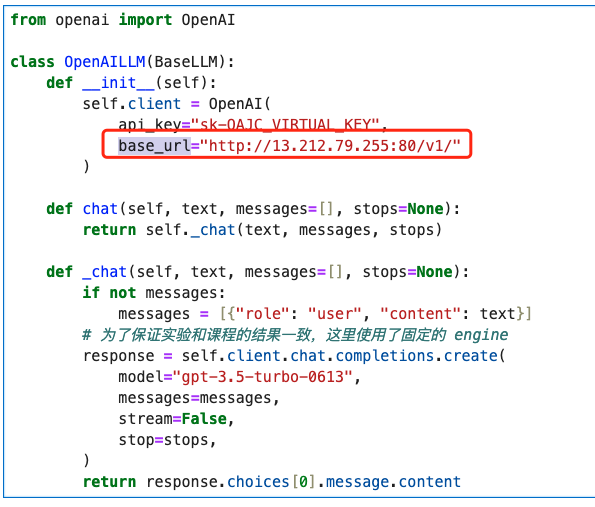
- 2.通过Nginx搭建代理地址：一台国外服务器 + openAI的apikey


**nginx 搭建步骤：**
1. 首先，我们需要在服务器上安装Nginx。在Ubuntu上，我们可以使用以下命令安装Nginx：

   ```
   sudo apt-get update
   sudo apt-get install nginx
   ```

   对于CentOS，我们可以使用以下命令：

   ```
   sudo yum update
   sudo yum install nginx
   ```

2. 安装完成后，我们可以使用以下命令启动Nginx：

   ```
   sudo service nginx start
   ```

3. 现在，我们需要创建一个新的Nginx配置文件。在/etc/nginx/sites-available/目录下创建一个新的配置文件，例如myconfig：

   ```
   sudo nano /etc/nginx/sites-available/myconfig
   ```

4. 在打开的编辑器中，复制并粘贴以下配置：

   ```python
   server {
       listen 80;
       location / {
       proxy_pass https://api.openai.com/;
       proxy_ssl_server_name on;
       proxy_set_header Host api.openai.com;
       chunked_transfer_encoding off;
       proxy_buffering off;
       proxy_cache off;
       #proxy_set_header X-Forwarded-For $remote_addr;
       }
   }
   ```

   保存并关闭文件。

5. 现在，我们需要创建一个到此配置文件的符号链接，以便Nginx可以找到它。在/etc/nginx/sites-enabled/ 目录下创建符号链接：

   ```sh
   sudo ln -s /etc/nginx/sites-available/myconfig /etc/nginx/sites-enabled/
   ```
6. 检查nginx语法   
    ```sh
    sudo nginx -t
    ```
    
    这个命令会检查所有Nginx配置文件的语法正确性，并尝试打开配置中引用的文件。如果配置文件没有问题，你会看到类似于以下的输出：
    
    ```sh
    nginx: configuration file /etc/nginx/nginx.conf test is successful
    ```
    



7. 最后，重启Nginx以应用我们的新配置：

   ```sh
   sudo service nginx restart
   ```

搭建完Nginx后，获取到代理地址 ip+监听端口， 比如 http://13.212.79.255:80/v1/ ， 其中13.212.79.255是服务器ip， 80是监听的端口对应server里的listen 80。

**GPT调用方法**
1. **安装包**
```sh
pip install openai
```
2. **代码示例：**
```python
# 导入必要的模块
from openai import OpenAI

# 定义 OpenAILLM 类
class OpenAILLM():
    def __init__(self):
        # 初始化 OpenAI 实例，传入环境变量中的 api_key 和 base_url
        self.client = OpenAI(
            api_key="xxxxxx", #xxxx替换成openai官方的apikey（切勿使用随课程发放的虚拟apikey）
            base_url="xxxxx", # 如果使用代理地址，请填入具体的代理地址比如（http://13.212.79.255:80/v1/）。如果本地可以科学上网，请选择全局科学，base_url这一行可以删除掉，或填入（https://api.openai.com/v1/）
        )
        
    def chat(self, text, messages=[], stops=None):
        # 调用 _chat 方法处理对话
        return self._chat(text, messages, stops)
        
    def _chat(self, text, messages=[], stops=None):
        if not messages:
            # 如果没有历史消息，则将用户输入作为第一条消息
            messages = [{"role": "user", "content": text}]
        
        # 使用固定的 engine 发送对话请求，并获取回复结果
        response = self.client.chat.completions.create(
            model="gpt-3.5-turbo-0613",
            messages=messages,
            stream=False,
            stop=stops,
        )
        
        # 返回回复内容
        return response.choices[0].message.content

# 初始化openai_bot实例
openai_bot = OpenAILLM()

# 定义prompt
prompt = "你好"

# 调用openai的接口
content = openai_bot.chat(prompt)

# 输出
print(content)
```